<a href="https://colab.research.google.com/github/nikogarro/Data-Science/blob/main/Forage/Predictive_model_for_British_Airways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
data= '/content/customer_booking.csv'


In [6]:
import chardet

with open('/content/customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [7]:
df= pd.read_csv(data, encoding='ISO-8859-1')

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [9]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [10]:
df.shape

(50000, 14)

In [11]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [12]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [13]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [14]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [15]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.053159
booking_origin           0.047490
flight_duration          0.017268
wants_extra_baggage      0.012217
wants_in_flight_meals    0.005839
num_passengers           0.005674
length_of_stay           0.005365
flight_hour              0.004542
purchase_lead            0.002936
wants_preferred_seat     0.001999
flight_day               0.001324
sales_channel            0.001137
trip_type                0.000359
Name: MI Scores, dtype: float64

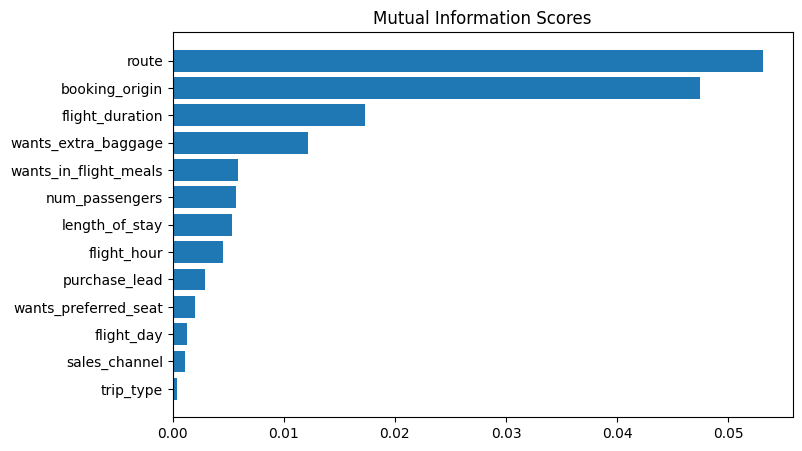

In [16]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [18]:
from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [20]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))


ACCURACY:  83.36
AUC score:  0.5657818407546988


In [26]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


In [23]:
from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.72
AUC score:  0.5189398567740671


In [24]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.98
AUC score:  0.5424676175552812


In [25]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.09
AUC score:  0.5577796717361984


Neighbor number K = 1     accuracy:  0.786
Neighbor number K = 2     accuracy:  0.834
Neighbor number K = 3     accuracy:  0.815
Neighbor number K = 4     accuracy:  0.839
Neighbor number K = 5     accuracy:  0.827
Neighbor number K = 6     accuracy:  0.841
Neighbor number K = 7     accuracy:  0.833
Neighbor number K = 8     accuracy:  0.842
Neighbor number K = 9     accuracy:  0.838
Neighbor number K = 10     accuracy:  0.844
Neighbor number K = 11     accuracy:  0.84
Neighbor number K = 12     accuracy:  0.843
Neighbor number K = 13     accuracy:  0.841
Neighbor number K = 14     accuracy:  0.844
Neighbor number K = 15     accuracy:  0.842
Neighbor number K = 16     accuracy:  0.846
Neighbor number K = 17     accuracy:  0.844
Neighbor number K = 18     accuracy:  0.846
Neighbor number K = 19     accuracy:  0.845
Neighbor number K = 20     accuracy:  0.847
Neighbor number K = 21     accuracy:  0.846
Neighbor number K = 22     accuracy:  0.848


KeyboardInterrupt: ignored

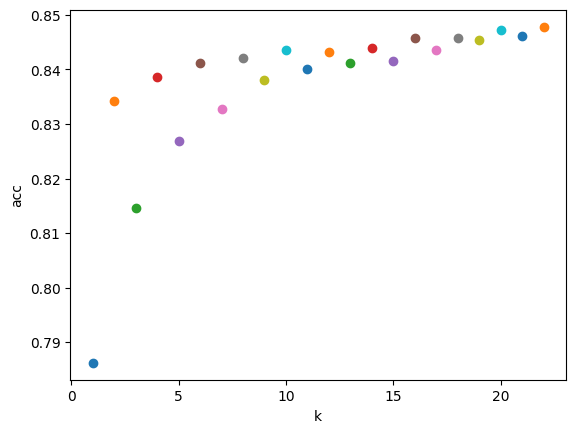

In [32]:
from sklearn.neighbors import KNeighborsClassifier

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

modelperformance=[]
from sklearn.metrics import accuracy_score
for k in range(1,30):
  knnClass = KNeighborsClassifier(n_neighbors=k)
  knnClass.fit(X_train, y_train)
  pred = knnClass.predict(X_val)
  score = accuracy_score(y_val, pred)
  modelperformance.append(score)
  print("Neighbor number K =",k,"    accuracy: ",round(score,3))
  plt.plot(k,score,ls ='', marker='o')
  plt.xlabel('k')
  plt.ylabel('acc')
print()
print("The highest accuracy was ",max(modelperformance),"with Κ=",modelperformance.index(max(modelperformance))+1)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

Neighbor number K = 1     accuracy:  0.768
Neighbor number K = 2     accuracy:  0.839
Neighbor number K = 3     accuracy:  0.816
Neighbor number K = 4     accuracy:  0.841
Neighbor number K = 5     accuracy:  0.832
Neighbor number K = 6     accuracy:  0.846
Neighbor number K = 7     accuracy:  0.838
Neighbor number K = 8     accuracy:  0.846
Neighbor number K = 9     accuracy:  0.844
Neighbor number K = 10     accuracy:  0.847
Neighbor number K = 11     accuracy:  0.846
Neighbor number K = 12     accuracy:  0.847
Neighbor number K = 13     accuracy:  0.846
Neighbor number K = 14     accuracy:  0.848
Neighbor number K = 15     accuracy:  0.847
Neighbor number K = 16     accuracy:  0.848
Neighbor number K = 17     accuracy:  0.847
Neighbor number K = 18     accuracy:  0.848
Neighbor number K = 19     accuracy:  0.848
Neighbor number K = 20     accuracy:  0.848

The highest accuracy was  0.8485 with Κ= 18
ACCURACY:  84.76
AUC score:  0.5479604084813514


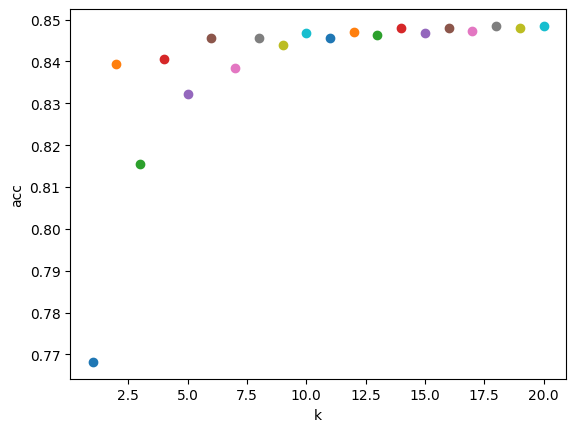

In [29]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)


modelperformance=[]
from sklearn.metrics import accuracy_score
for k in range(1,21):
  knnClass = KNeighborsClassifier(n_neighbors=k)
  knnClass.fit(X_train, y_train)
  pred = knnClass.predict(X_val)
  score = accuracy_score(y_val, pred)
  modelperformance.append(score)
  print("Neighbor number K =",k,"    accuracy: ",round(score,3))
  plt.plot(k,score,ls ='', marker='o')
  plt.xlabel('k')
  plt.ylabel('acc')
print()
print("The highest accuracy was ",max(modelperformance),"with Κ=",modelperformance.index(max(modelperformance))+1)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

Depth of tree = 1     accuracy:  0.849
Depth of tree = 2     accuracy:  0.849
Depth of tree = 3     accuracy:  0.848
Depth of tree = 4     accuracy:  0.848
Depth of tree = 5     accuracy:  0.848
Depth of tree = 6     accuracy:  0.849
Depth of tree = 7     accuracy:  0.848
Depth of tree = 8     accuracy:  0.848
Depth of tree = 9     accuracy:  0.848
Depth of tree = 10     accuracy:  0.848
Depth of tree = 11     accuracy:  0.847
Depth of tree = 12     accuracy:  0.847
Depth of tree = 13     accuracy:  0.847
Depth of tree = 14     accuracy:  0.846
Depth of tree = 15     accuracy:  0.847
Depth of tree = 16     accuracy:  0.845
Depth of tree = 17     accuracy:  0.845
Depth of tree = 18     accuracy:  0.844
Depth of tree = 19     accuracy:  0.843
Depth of tree = 20     accuracy:  0.844

The highest accuracy was  0.849 with max depth= 5
ACCURACY:  84.76
AUC score:  0.5479604084813514


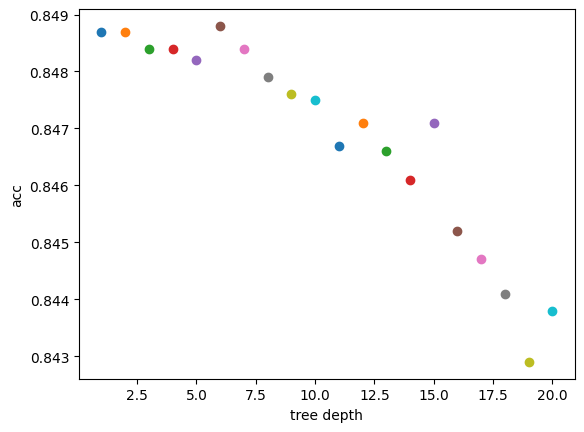

In [30]:
from sklearn.tree import DecisionTreeClassifier

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

modelperformance=[]
for k in range(1,21):
  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=k)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_val)
  score = accuracy_score(y_val, pred)
  modelperformance.append(score)
  print("Depth of tree =",k,"    accuracy: ",round(score,3))
  plt.plot(k,score,ls ='', marker='o')
  plt.xlabel('tree depth')
  plt.ylabel('acc')
print()
print("The highest accuracy was ",max(modelperformance).round(3),"with max depth=",modelperformance.index(max(modelperformance)))

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

Depth of tree = 1     accuracy:  0.849
Depth of tree = 2     accuracy:  0.849
Depth of tree = 3     accuracy:  0.849
Depth of tree = 4     accuracy:  0.849
Depth of tree = 5     accuracy:  0.849
Depth of tree = 6     accuracy:  0.849
Depth of tree = 7     accuracy:  0.848
Depth of tree = 8     accuracy:  0.848
Depth of tree = 9     accuracy:  0.846
Depth of tree = 10     accuracy:  0.845
Depth of tree = 11     accuracy:  0.842
Depth of tree = 12     accuracy:  0.84
Depth of tree = 13     accuracy:  0.838
Depth of tree = 14     accuracy:  0.836
Depth of tree = 15     accuracy:  0.835
Depth of tree = 16     accuracy:  0.833
Depth of tree = 17     accuracy:  0.831
Depth of tree = 18     accuracy:  0.831
Depth of tree = 19     accuracy:  0.828
Depth of tree = 20     accuracy:  0.824

The highest accuracy was  0.849 with max depth= 5
ACCURACY:  84.76
AUC score:  0.5479604084813514


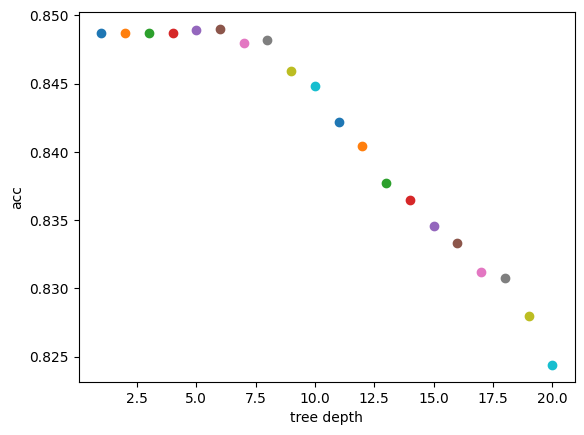

In [31]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)


modelperformance=[]
for k in range(1,21):
  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=k)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_val)
  score = accuracy_score(y_val, pred)
  modelperformance.append(score)
  print("Depth of tree =",k,"    accuracy: ",round(score,3))
  plt.plot(k,score,ls ='', marker='o')
  plt.xlabel('tree depth')
  plt.ylabel('acc')
print()
print("The highest accuracy was ",max(modelperformance).round(3),"with max depth=",modelperformance.index(max(modelperformance)))

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))